In [6]:
!unzip neural-style-tf.zip

Archive:  neural-style-tf.zip
replace __MACOSX/._neural-style-tf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._neural-style-tf  
replace __MACOSX/neural-style-tf/._image_input? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/neural-style-tf/._image_input  
  inflating: neural-style-tf/.DS_Store  
  inflating: __MACOSX/neural-style-tf/._.DS_Store  
  inflating: neural-style-tf/requirements.txt  
  inflating: __MACOSX/neural-style-tf/._requirements.txt  
  inflating: neural-style-tf/neural_style.py  
  inflating: __MACOSX/neural-style-tf/._neural_style.py  
  inflating: __MACOSX/neural-style-tf/._styles  
  inflating: neural-style-tf/image_input/qat.png  
  inflating: __MACOSX/neural-style-tf/image_input/._qat.png  
  inflating: neural-style-tf/image_input/qat2.png  
  inflating: __MACOSX/neural-style-tf/image_input/._qat2.png  
  inflating: neural-style-tf/image_input/golden_gate.jpg  
  inflating: __MACOSX/neural-style-tf/image_input/._golden_gate.jpg  

In [10]:
#install TF 1.15 to avoid some annoying warning messages
%tensorflow_version 1.x
import tensorflow as tf
import imageio
!pip install pillow
print(tf.__version__)

1.15.2


In [16]:
#import some image display tools
from IPython.display import Image, display
#change into that directory
%cd neural-style-tf/
#install the library dependencies (it's likely Colab already has them installed, but let's be sure)
!pip install -r requirements.txt
#install the VGG19 pre-trained model
!wget http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat

[Errno 2] No such file or directory: 'neural-style-tf/'
/content/neural-style-tf
--2021-10-21 23:16:46--  http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Resolving www.vlfeat.org (www.vlfeat.org)... 64.90.48.57
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat [following]
--2021-10-21 23:16:47--  https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534904783 (510M)
Saving to: ‘imagenet-vgg-verydeep-19.mat’

imagenet-vgg-veryde 100%[===================>] 510.12M  21.0MB/s    in 26s     

2021-10-21 23:17:13 (20.0 MB/s) - ‘imagenet-vgg-verydeep-19.mat’ saved [534904783/534904783]



In [14]:
#let's make sure we're in the right folder
!pwd
# we should see "/content/neural-style-tf"

/content/neural-style-tf


In [17]:
!python neural_style.py --content_img saudi_girl.png --style_imgs aseer.png --img_output_dir ./First-style
!python neural_style.py --content_img saudi_girl.png --style_imgs hijaz.jpeg --img_output_dir ./Second-style
!python neural_style.py --content_img saudi_girl.png --style_imgs najd.jpg --img_output_dir ./Third-style


---- RENDERING SINGLE IMAGE ----

2021-10-21 23:17:22.062204: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-21 23:17:22.074653: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-21 23:17:22.075251: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2021-10-21 23:17:22.075494: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-21 23:17:22.076911: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-21 23:17:22.077707: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Success

This may take a couple minutes to run, but if you see `Single image elapsed time: [some number]` then it has completed.

Let’s take a look at the content image, the style image, and what it combined to.

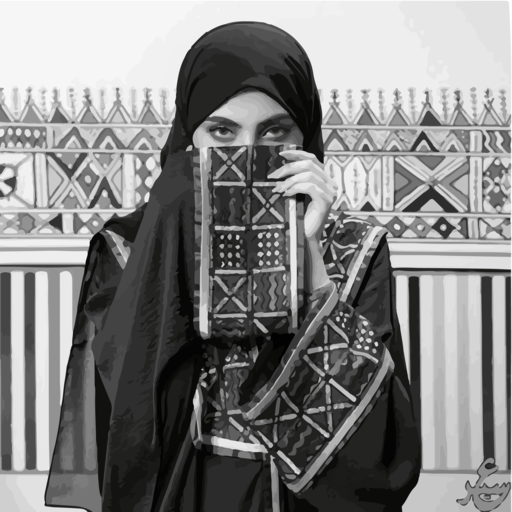

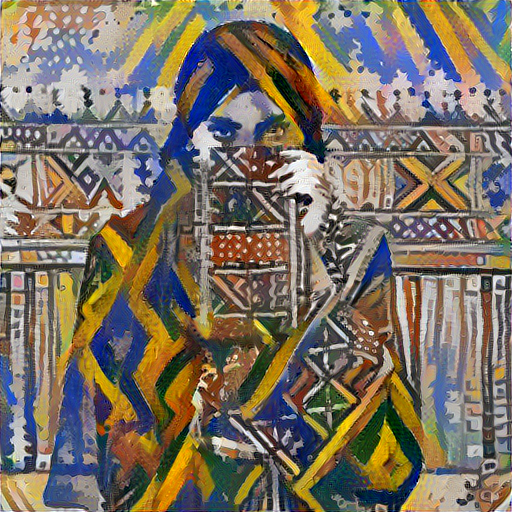

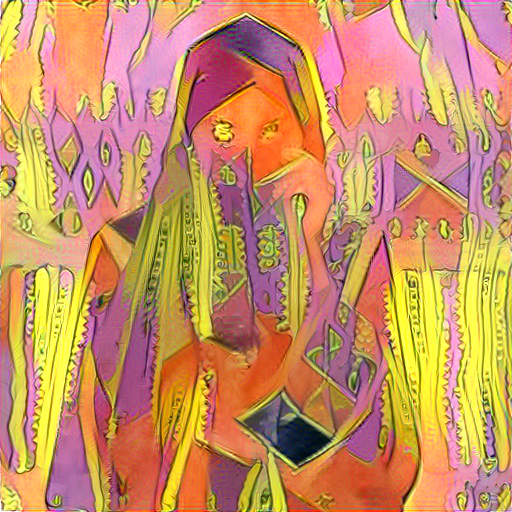

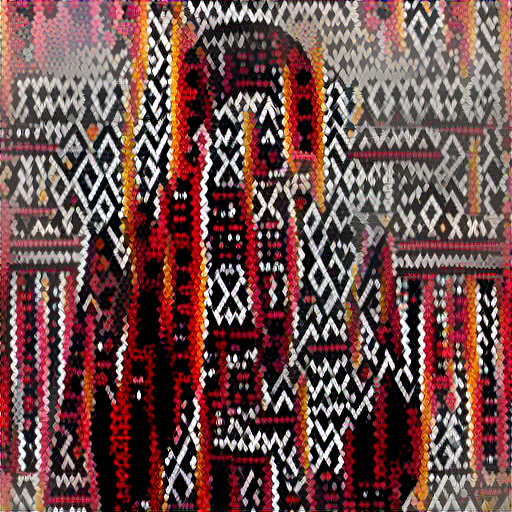

In [19]:
import numpy
import PIL
Images = []
listOfImageNames = ['/content/neural-style-tf/First-style/1000/content.png',
                    '/content/neural-style-tf/First-style/1000/First-style-1000.png',
                    '/content/neural-style-tf/Second-style/1000/Second-style-1000.png',
                    '/content/neural-style-tf/Third-style/1000/Third-style-1000.png']
for imageName1 in listOfImageNames:
  I = numpy.asarray(PIL.Image.open(imageName1))
  Images.append(I)

imageio.mimsave('/content/neural-style-tf/saudi_culture.gif', Images, duration = 2)

for imageName in listOfImageNames:
    display(Image(filename=imageName))